In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygad

In [223]:
item_number = np.arange(1, 301)
weights = np.random.randint(1, 100, size=300)
values = np.random.randint(5, 55, size=300)
knapsack_capacity = 5000

items_df = pd.DataFrame({
    'Item': item_number,
    'Weight': weights,
    'Value': values
})

items_df

,Item,Weight,Value
0,1,2,14
1,2,95,26
2,3,1,35
3,4,59,12
4,5,71,54
...,...,...,...
295,296,14,17
296,297,62,34
297,298,99,20
298,299,64,26


In [224]:
def fitness_func(ga_instance, solution, solution_idx):
    total_w = np.sum(solution * np.array(items_df['Weight']))
    total_val = np.sum(solution * np.array(items_df['Value']))
    if total_w > knapsack_capacity:
        # return 0.0    # hard penalty
        return total_val - 2*(max(0, total_w - knapsack_capacity))  # soft penalty
    return float(total_val)

In [225]:
num_generations = 1000
num_parents_mating = 20
fitness_function = fitness_func
sol_per_pop = 100
num_genes = len(items_df)
print(num_genes)
parent_selection_type = "sss"
keep_parents = 1
crossover_type = "uniform"
mutation_type = "random"
mutation_percent_genes = 10


300


In [226]:
def on_generation(ga):      # only used for plotting
    fitness_vals = ga.last_generation_fitness
    avg_fitness_per_gen.append(np.mean(fitness_vals))
    worst_fitness_per_gen.append(np.min(fitness_vals))
    sorted_fitness = sorted(fitness_vals, reverse=True)

    second_best = sorted_fitness[1] if len(sorted_fitness) > 1 else sorted_fitness[0]
    second_best_fitness_per_gen.append(second_best)

In [227]:
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_type=int,
    on_generation=on_generation,
    gene_space=[0, 1],
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes)


/home/pero/miniconda3/envs/genetic-algo/lib/python3.11/site-packages/pygad/pygad.py:1136: UserWarning: Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.
  warnings.warn("Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.")


In [228]:
avg_fitness_per_gen = []
worst_fitness_per_gen = []
second_best_fitness_per_gen = []

ga_instance.run()

In [229]:
solution, fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))

prediction_w = np.sum(np.array(items_df['Weight'])*solution)
prediction_v = np.sum(np.array(items_df['Value'])*solution)
print(f"Predicted output based on the best solution : weight = {prediction_w} and value = {prediction_v}")

Parameters of the best solution : [1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1
 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1
 0 0 0 1]
Predicted output based on the best solution : weight = 4965 and value = 4253


/home/pero/miniconda3/envs/genetic-algo/lib/python3.11/site-packages/pygad/visualize/plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


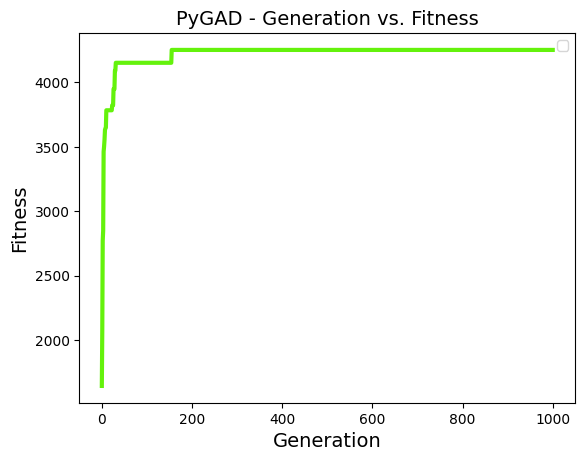

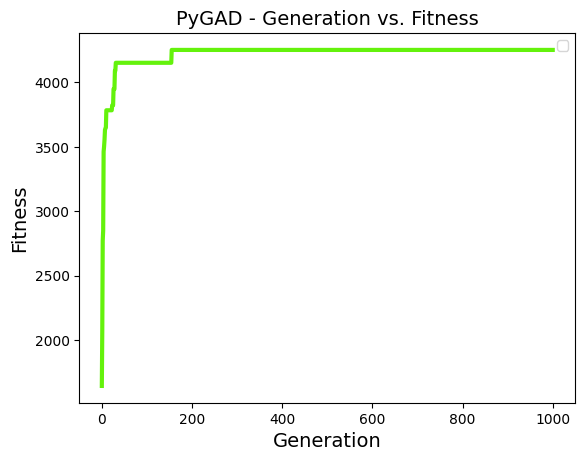

In [230]:
ga_instance.plot_fitness()


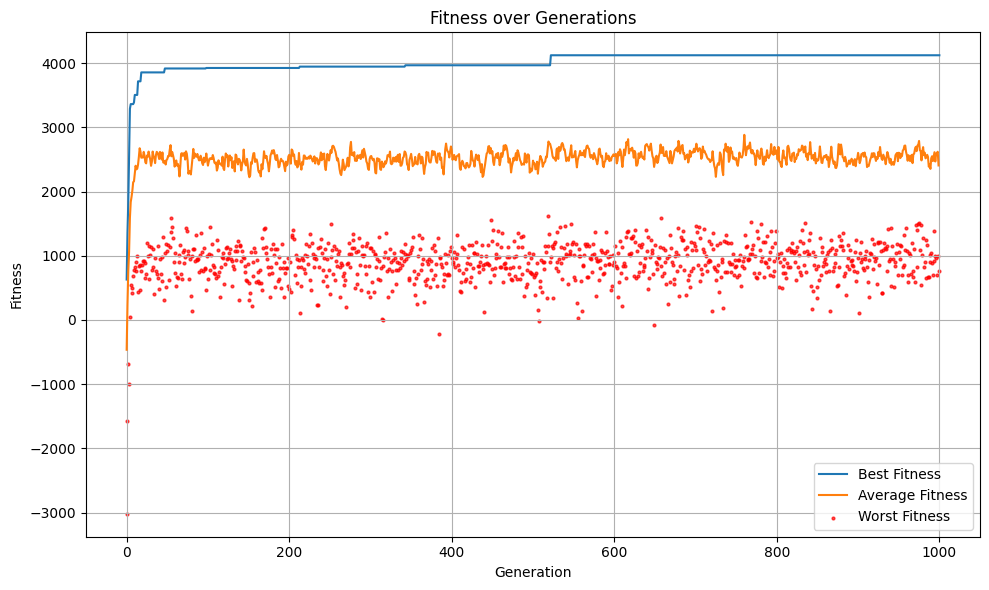

In [208]:
best_fitness = ga_instance.best_solutions_fitness

plt.figure(figsize=(10, 6))
plt.plot(best_fitness, label='Best Fitness')
plt.plot(avg_fitness_per_gen, label='Average Fitness')
# plt.plot(worst_fitness_per_gen, label='Worst Fitness')    # usar linha ou ponto pro plot

plt.scatter(range(len(worst_fitness_per_gen)), worst_fitness_per_gen, label='Worst Fitness', s=4, alpha=0.7,color='red')
plt.title('Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

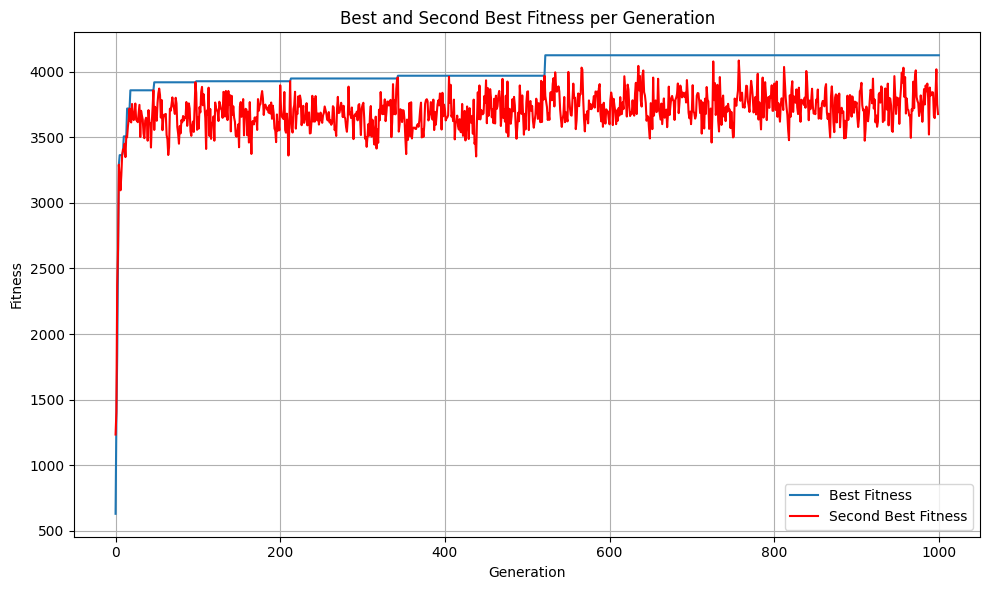

In [209]:

plt.figure(figsize=(10, 6))
plt.plot(best_fitness, label='Best Fitness')
plt.plot(second_best_fitness_per_gen, label='Second Best Fitness',color='red')
plt.title('Best and Second Best Fitness per Generation')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

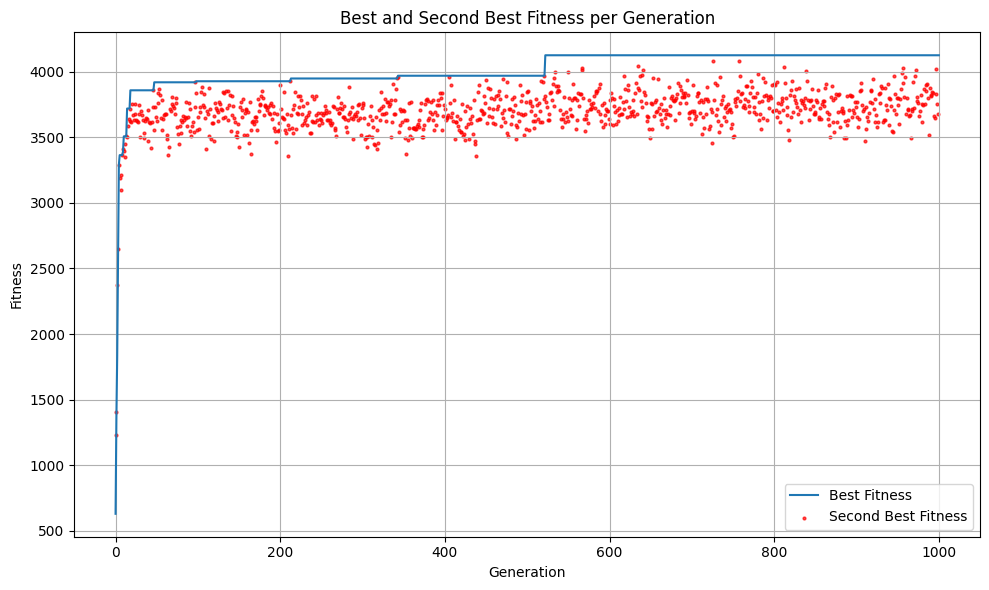

In [210]:
plt.figure(figsize=(10, 6))
plt.plot(best_fitness, label='Best Fitness')
plt.scatter(range(len(second_best_fitness_per_gen)), second_best_fitness_per_gen, label='Second Best Fitness', s=4, alpha=0.7,color='red')

plt.title('Best and Second Best Fitness per Generation')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
